In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sn
from sklearn.model_selection import train_test_split

from random import seed
seed(1)
seed = 43

import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ",keras.__version__)


kaggle = 0 # Kaggle path active = 1

# change your local path here
if kaggle == 1 :
    MNIST_PATH= '../input/digit-recognizer'
else:
    MNIST_PATH= '../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer'



import os
for dirname, _, filenames in os.walk(MNIST_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Tensorflow Version:  2.3.0
Keras Version:  2.4.0
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\keras_reg_160_10_002.sav
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\keras_reg_jl_160_10_002.sav
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\sample_submission.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\test.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\train.csv


# Introduction - MNIST Training Competition
This notebook is a fork of my previous developed notebook for digit recognition. Therefore you will find some parts that look common the the notebook <a href="https://www.kaggle.com/skiplik/digit-recognition-with-a-deep-neural-network">Digit Recognition with a Deep Neural Network</a> and some parts that are completely different.

With this I want to take a deeper look in some parts of finetuning hyperparameters. The following list shows some of the finetuning parameters which I will take a look into, one or two ore more ... :
- Dwindling / Exploding Gradients
    - <b>Initializing the Weights</b>
    - <b>Batchnormalization</b>
    - <s>Gradient Clipping</s>
    - <b>Saturated Activataion Functions</b>
- Optimizers
    - <s>Momentum Optimizers</s>
    - <s>Nesterov</s>
    - <s>AdaGrad</s>
    - <s>RMSProp</s>
    - <b>Adam - Optimizer</b>
    - <s>Scheduling Learnrate</s>
- Regulations
    - <s>Drop-Outs</s>
    - <b>l1 / l2 - Regulations</b>
    - <s>Monte-Carlo Drop-out ???</s>
    - <s>Max Norm Regulations ????</s>

Not part of this notebook will be the use of pretrained neural networks (Transferlearning). I just want to list this here for the sake of completeness.

Link to the data topic: https://www.kaggle.com/c/digit-recognizer/data

As in the previous notebooks I will use Tensorflow with Keras. I already mentioned in other notebooks, I will skip some explanations about the data set here. Moreover I will use the already discovered knowledge about the data and transform/prepare the data rightaway.

## Notebook Versions with Different Hyperparameter Configurations
As described in the part above, I used/tested different hyperparameter settings to get a little bit closer to its effects on the neural network and the network's results. I know that there are parameters that effect other parameters when they have changed (and therefore should have been changed as well), however in these cases I just tried a little bit around. Sometimes I kept one or two parameters together, which should be together (e.g. kernel initializer "lecun" and activation function "selu") and sometimes not. The main purpose here was to use them and see the results.

Therefore on Kaggle you can look in the different versions of this notebook if you are interested. In the following I will list some versions with the used hyperparameter config in it:
- Version 7 and 6:
    - Activation Function - "relu"
    - Initializing Weights - "He Normalization"
    - Batchnormalization
- Version 9:
    - Activation Function - "selu"
    - Initializing Weights - "LeCun Normal"
- Version 12 and 14:
    - Regularisation with L1 and L2
- Version 15:
    - Activation Function - "relu"
    - Initializing Weights - "He Normalization"
    - Batchnormalization
    - Optimizer - "Adam"

The current best run was based on the Version 7 with an accuracy of 0.97657 on the kaggle competition "Digit Recognzier"


## My other Projects
If you are interested in some more clearly analysis of the dataset take a look into my other notebooks about the MNIS-dataset:
- Digit Recognition with a Deep Neural Network: https://www.kaggle.com/skiplik/digit-recognition-with-a-deep-neural-network
- Another MNIST Try: https://www.kaggle.com/skiplik/another-mnist-try
- First NN by Detecting Handwritten Characters: https://www.kaggle.com/skiplik/first-nn-by-detecting-handwritten-characters
...




# Get Data

In [130]:
# Data path and file
CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'

def load_mnist_data(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    return pd.read_csv(csv_path)

def load_mnist_data_manuel(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data

def split_train_val(data, val_ratio):
    return 
    

train = load_mnist_data(MNIST_PATH,CSV_FILE_TRAIN)
test = load_mnist_data(MNIST_PATH,CSV_FILE_TEST)

In [96]:
y = train['label'].copy()
X = train.drop(['label'], axis=1)

X_test = test.copy()

## Train / Val Split

In [97]:
print("Shape of the Features: ",X.shape)
print("Shape of the Labels: ", y.shape)

Shape of the Features:  (42000, 784)
Shape of the Labels:  (42000,)


### Label Value Count
Visualizing the label distribution of the full train dataset.

In [98]:
train.value_counts('label')

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
dtype: int64

In [99]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=seed, test_size=0.20
                                                  , stratify=y
                                                 )

Comparing the equally splitted train- and val-sets based on the given label y.

In [100]:
print("Train - Set Distribution")
print(y_train.value_counts() / y_train.value_counts().sum() )
print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
print("Val - Set Distribution")
print(y_val.value_counts() / y_val.value_counts().sum() )


Train - Set Distribution
1    0.111518
7    0.104792
3    0.103601
9    0.099702
2    0.099464
6    0.098512
0    0.098363
4    0.096964
8    0.096726
5    0.090357
Name: label, dtype: float64
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Val - Set Distribution
1    0.111548
7    0.104762
3    0.103571
9    0.099762
2    0.099405
0    0.098452
6    0.098452
4    0.096905
8    0.096786
5    0.090357
Name: label, dtype: float64


In [101]:
print("X: ", X.shape)
print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)

print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)

X:  (42000, 784)
X_train:  (33600, 784)
X_val:  (8400, 784)
y_train:  (33600,)
y_val:  (8400,)


## Building Transforming Piplines

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    #('normalizer', Normalizer())
    ('std_scalar',StandardScaler())
])

In [103]:
X_train_prep = pipeline.fit_transform(X_train)      # fitting the pipeline to the train and transform it
X_val_prep = pipeline.transform(X_val)              # transform val data with this information

# Building a Deep Neural Network

## Preparing Model Visualization with Tensorboard (not for Kaggle)

In [104]:
root_logdir = "../../tensorboard-logs"

print("Relative root_logdir: ",root_logdir)

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

Relative root_logdir:  ../../tensorboard-logs


In [105]:
run_logdir = get_run_logdir()
print("Current run logdir for Tensorboard: ", run_logdir)

Current run logdir for Tensorboard:  ../../tensorboard-logs\run_2021_10_04-12_44_59


In [106]:
run_logdir

'../../tensorboard-logs\\run_2021_10_04-12_44_59'

### Keras Callbacks for Tensorboard
With Keras there is a way of using Callbacks for the Tensorboard to write log files for the board and visualize the different graphs (loss and val curve)


In [107]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

## Building Model Architecture

In [108]:
from keras.layers import LeakyReLU

input_shape=[784]
input_shape_notFlattened=[28,28]


learning_rt = 1e-03 
activation_fn = "relu"
initializer = "he_normal"
regularizer =  keras.regularizers.l2(0.01)

# Model building
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=input_shape_notFlattened))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(500, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer)) ## add  kernel_regularizer=keras.regularizers.l2(0.01)) ???
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))

model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_uniform"))


optimizer = keras.optimizers.Adam(learning_rate=learning_rt)


model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'] )


In [109]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 784)               3136      
_________________________________________________________________
dense_35 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_8 (Batch (None, 500)               2000      
_________________________________________________________________
dense_36 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_9 (Batch (None, 300)               1200      
_________________________________________________________________
dense_37 (Dense)             (None, 300)              

## Model Checkpoints

In [110]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_train_model.h5", save_best_only=True, save_weights_only=False)

## Model Training

In [111]:
history = model.fit(X_train_prep, y_train, epochs=200, validation_data=(X_val_prep, y_val), callbacks=[checkpoint_cb, keras.callbacks.EarlyStopping(patience=20), tensorboard_cb])

Epoch 1/200
1050/1050 [==============================] - 8s 8ms/step - loss: 8.3228 - accuracy: 0.8493 - val_loss: 1.0792 - val_accuracy: 0.8963
Epoch 2/200
1050/1050 [==============================] - 7s 7ms/step - loss: 1.1528 - accuracy: 0.8535 - val_loss: 1.0300 - val_accuracy: 0.8927
Epoch 3/200
1050/1050 [==============================] - 7s 6ms/step - loss: 1.1355 - accuracy: 0.8576 - val_loss: 1.1067 - val_accuracy: 0.8755
Epoch 4/200
1050/1050 [==============================] - 7s 6ms/step - loss: 1.1671 - accuracy: 0.8620 - val_loss: 1.0840 - val_accuracy: 0.8904
Epoch 5/200
1050/1050 [==============================] - 7s 6ms/step - loss: 1.1335 - accuracy: 0.8714 - val_loss: 0.9490 - val_accuracy: 0.9218
Epoch 6/200
1050/1050 [==============================] - 7s 6ms/step - loss: 1.0959 - accuracy: 0.8758 - val_loss: 0.9718 - val_accuracy: 0.9135
Epoch 7/200
1050/1050 [==============================] - 7s 6ms/step - loss: 1.0045 - accuracy: 0.8891 - val_loss: 0.9143 - val_ac

## Visualizing the Progress

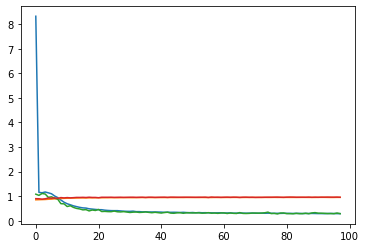

In [116]:
plt.plot(pd.DataFrame(history.history))
plt.show()

### Model Training with Full Dataset 
In this part I will train the model with the full dataset. This time I will use the discovered hyperparameters from previous section.

In [112]:

# Model building
model_full = keras.models.Sequential()

model_full.add(keras.layers.Flatten(input_shape=input_shape_notFlattened))
model_full.add(keras.layers.BatchNormalization())
model_full.add(keras.layers.Dense(500, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer)) ## add  kernel_regularizer=keras.regularizers.l2(0.01)) ???
model_full.add(keras.layers.BatchNormalization())
model_full.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model_full.add(keras.layers.BatchNormalization())
model_full.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model_full.add(keras.layers.BatchNormalization())
model_full.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model_full.add(keras.layers.BatchNormalization())
model_full.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))
model_full.add(keras.layers.BatchNormalization())
model_full.add(keras.layers.Dense(300, activation=activation_fn, kernel_initializer=initializer, kernel_regularizer= regularizer))

model_full.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_uniform"))


optimizer = keras.optimizers.SGD(learning_rate=learning_rt)


model_full.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'] )

In [113]:
model_full.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 784)               3136      
_________________________________________________________________
dense_42 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_14 (Batc (None, 500)               2000      
_________________________________________________________________
dense_43 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_15 (Batc (None, 300)               1200      
_________________________________________________________________
dense_44 (Dense)             (None, 300)              

In [114]:
# creating a new log dir for tensorboard
tensorboard_cb_f = keras.callbacks.TensorBoard(get_run_logdir())
checkpoint_cb_f = keras.callbacks.ModelCheckpoint("my_modell_full.h5", save_best_only=False, save_weights_only=False)

In [115]:
# preparing data based on our beautifull trained data pipeline
X_prep_all = pipeline.transform(X)

In [117]:
# Train the model again pleeeeease with all you got .... especially the new transformed data matrix X 
history_full = model_full.fit(X_prep_all, y, epochs=100, callbacks=[tensorboard_cb_f, checkpoint_cb_f])

Epoch 1/100
1313/1313 [==============================] - 9s 7ms/step - loss: 40.0919 - accuracy: 0.6068
Epoch 2/100
1313/1313 [==============================] - 8s 6ms/step - loss: 37.4432 - accuracy: 0.8290
Epoch 3/100
1313/1313 [==============================] - 8s 6ms/step - loss: 35.4226 - accuracy: 0.8727
Epoch 4/100
1313/1313 [==============================] - 8s 6ms/step - loss: 33.5667 - accuracy: 0.8924
Epoch 5/100
1313/1313 [==============================] - 8s 6ms/step - loss: 31.8310 - accuracy: 0.9057
Epoch 6/100
1313/1313 [==============================] - 8s 6ms/step - loss: 30.1897 - accuracy: 0.9142
Epoch 7/100
1313/1313 [==============================] - 8s 6ms/step - loss: 28.6389 - accuracy: 0.9218
Epoch 8/100
1313/1313 [==============================] - 8s 6ms/step - loss: 27.1702 - accuracy: 0.9269
Epoch 9/100
1313/1313 [==============================] - 8s 6ms/step - loss: 25.7747 - accuracy: 0.9335
Epoch 10/100
1313/1313 [==============================] - 8s 6ms

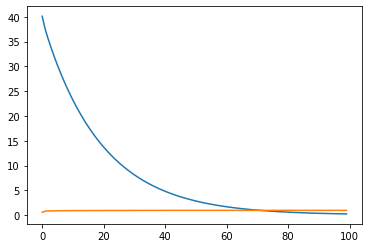

In [118]:
plt.plot(pd.DataFrame(history_full.history))
plt.show()

# Image Prediction of Unknown Data (Test Data)

## Peparing Test Data
The test data for the competition needs to be prepared as well as did with the training data set. Therefore the trained pipeline (trained only on the training dataset) will be used.

In [119]:
X_test_prep = pipeline.transform(X_test)

In [120]:
X_test_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Creating Competition File

In [121]:
mnist_competition_file = pd.DataFrame(columns=['ImageId','Label'])

## Prediction of Testdata

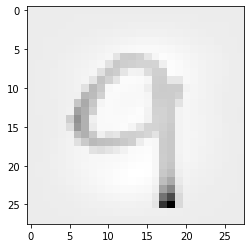

In [122]:
plt.imshow(X_test_prep[43].reshape(28,28), cmap='Greys')

In [123]:
print("Propability of all lables for given pixels: ", model_full.predict(X_test_prep[43].reshape(1,-1)))

Propability of all lables for given pixels:  [[3.8676979e-05 2.8920460e-05 4.2562166e-05 2.6667052e-05 2.5978990e-04
  4.2574062e-05 4.1488562e-05 6.3997300e-05 9.2300172e-05 9.9936301e-01]]


In [124]:
print("Predicted Digit: ",np.argmax(model_full.predict(X_test_prep[43].reshape(1,-1))))

Predicted Digit:  9


In [125]:
predictions = model_full.predict(X_test_prep)

In [126]:
i = 0
for row in X_test_prep:
    index = i + 1
    predicted_label = pd.Series(np.argmax(predictions, axis=1))[i]

    mnist_competition_file = mnist_competition_file.append({'ImageId': index, 'Label': predicted_label}, ignore_index = True )
    i = i + 1
    pass

In [127]:
mnist_competition_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [128]:
mnist_competition_file.ImageId = mnist_competition_file.ImageId.astype(int)
mnist_competition_file.Label = mnist_competition_file.Label.astype(int)

In [129]:
mnist_competition_file.to_csv('mnist_submission.csv', index=False)